In [7]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [2]:
#parameter of test function
COEFF=0.05

In [3]:
#plot functions
def function(x):
    return np.sin(x) * np.exp(-COEFF*x)

def upper(x):
    return np.exp(-COEFF*x)

def lower(x):
    return -np.exp(-COEFF*x)


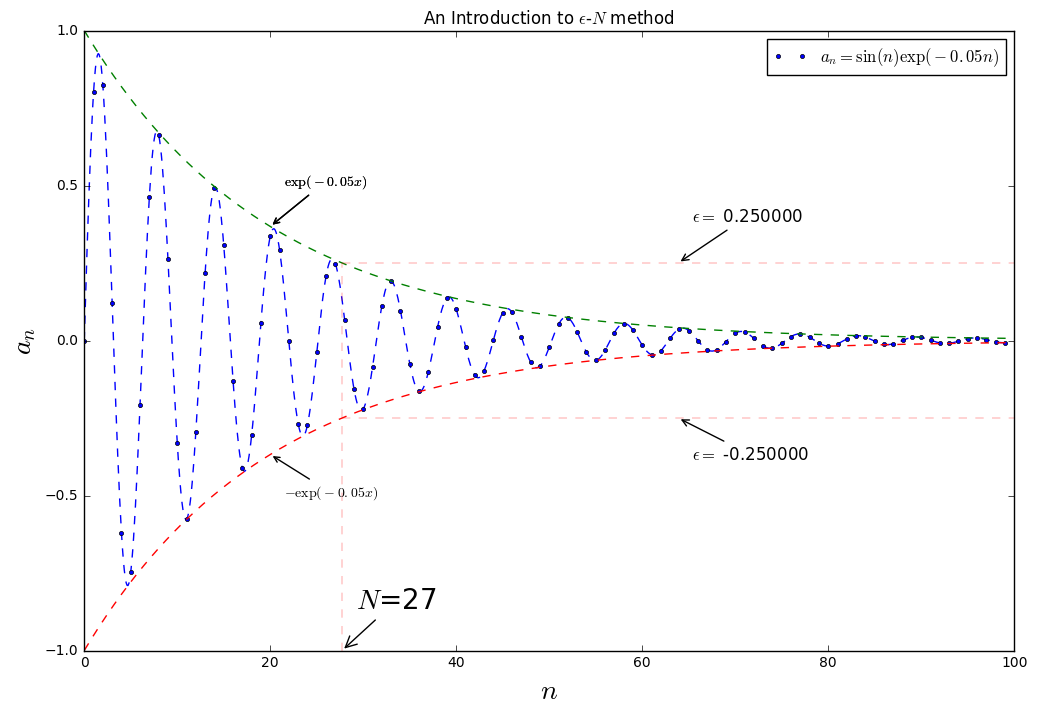

In [4]:
def draw(ax, EPSILON):
    xmax=100
    xs=np.linspace(0,xmax,1000)
    ys=function(xs)

    ns=[n for n in range(xmax)]
    seq=[function(n) for n in ns]

    ax.set_title(r"An Introduction to $\epsilon$-$N$ method")
    ax.set_xlabel(r"$n$", fontsize=20)
    ax.set_ylabel(r"$a_n$", fontsize=20)
    ax.plot(xs,function(xs),'--',markersize=2)
    ax.plot(ns,seq,'bo',label=r'$a_n=\sin(n) \exp(-{}n)$'.format(COEFF),markersize=3)

    ax.annotate(r'$\exp(-{}x)$'.format(COEFF),xy=(20,upper(20)),xycoords='data',
                    arrowprops=dict(arrowstyle="->"),
                    xytext=(+10,+30),textcoords='offset points')
    
    ax.plot(xs,upper(xs),'--')
    ax.annotate(r'$\exp(-{}x)$'.format(COEFF),xy=(20,upper(20)),xycoords='data',
                    arrowprops=dict(arrowstyle="->"),
                    xytext=(+10,+30),textcoords='offset points')

    ax.plot(xs,lower(xs),'--')
    ax.annotate(r'$-\exp(-{}x)$'.format(COEFF),xy=(20,lower(20)),xycoords='data',
                    arrowprops=dict(arrowstyle="->"),
                    xytext=(+10,-30),textcoords='offset points')

    N=np.log(EPSILON)/-COEFF

    ax.plot([N,xmax],[EPSILON,EPSILON],linewidth=0.25,linestyle="--",color='r')
    ax.annotate(r'$\epsilon=$ %f'% EPSILON ,xy=((N+100)/2.0,EPSILON),xycoords='data',
                    arrowprops=dict(arrowstyle="->"),
                    xytext=(+10,+30),fontsize=12,textcoords='offset points')

    ax.plot([N,xmax],[-EPSILON,-EPSILON],linewidth=0.25,linestyle="--",color='r')
    ax.annotate(r'$\epsilon=$ %f'% -EPSILON ,xy=((N+100)/2.0,-EPSILON),xycoords='data',
                    arrowprops=dict(arrowstyle="->"),
                    xytext=(+10,-30),fontsize=12,textcoords='offset points')

    ax.plot([N,N],[ax.get_ylim()[0],EPSILON],linewidth=0.25,linestyle="--",color='r')
    ax.annotate(r'$N$=%d'%N, xy=(N,ax.get_ylim()[0]),xycoords='data',
                    arrowprops=dict(arrowstyle="->"),
                    xytext=(+10,+30),fontsize=20,textcoords='offset points')

    ax.legend(loc='upper right')

def create(EPSILON):
    fig,ax=plt.subplots(figsize=(12,8))
    draw(ax,EPSILON=0.25) 

create(EPSILON=0.25)
plt.show()


<function __main__.create>

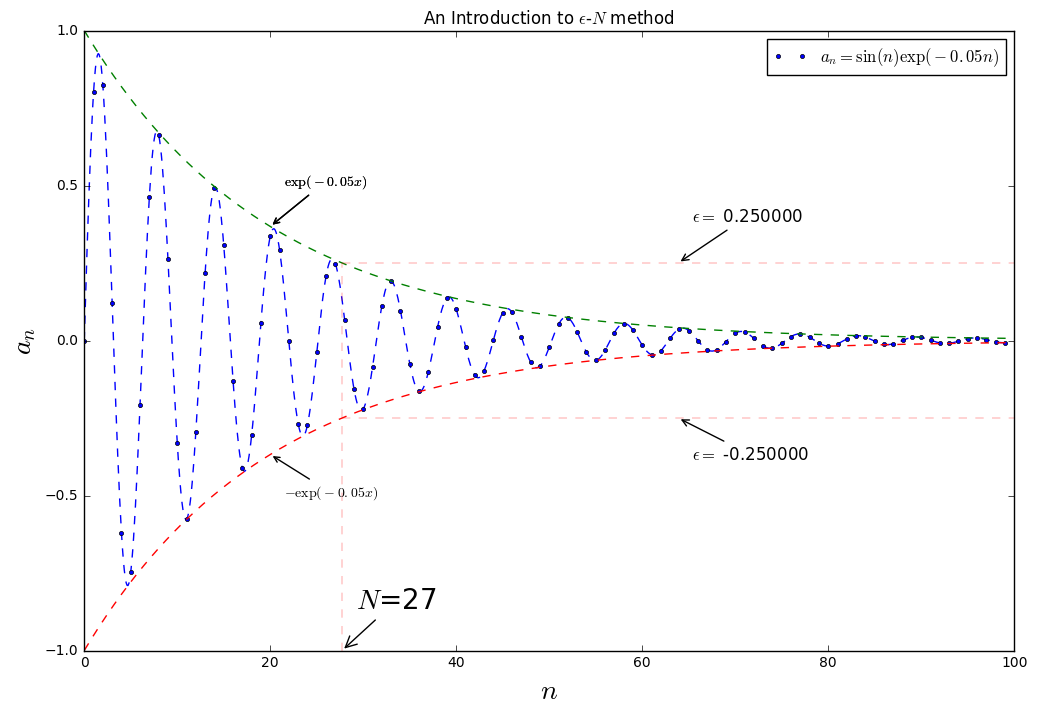

In [5]:
float_text=widgets.FloatText(min=0.000001,max=0.5,value=0.4)
epsilon_slider=widgets.FloatSlider(min=0.000001,max=0.5,value=0.4,step=0.005)
widgets.jslink((float_text, 'value'), (epsilon_slider, 'value'))
display(float_text)
interact(create,EPSILON=epsilon_slider)

In [13]:
from matplotlib import animation
import copy

float_text=widgets.FloatText(min=0.000001,max=0.5,value=0.4)
epsilon_slider=widgets.FloatSlider(min=0.000001,max=0.5,value=0.4,step=0.005)
widgets.jslink((float_text, 'value'), (epsilon_slider, 'value'))


progress=widgets.FloatProgress(
    value=0.000001,
    min=0.000001,
    max=0.5,
    step=0.005)
progress.description="ready"

epsilon=0.4
ax=None

def save_animation(EPSILON):
    step=0.01
    global epsilon
    global fig, ax
    epsilon=EPSILON
    fig,ax=plt.subplots(figsize=(12,8))
    def animate(*args):
        global epsilon,  ax
        ax.clear()
        print(epsilon)
        progress.value=epsilon
        draw(ax,EPSILON=epsilon)
        epsilon-=step
        return ax
    ani=animation.FuncAnimation(fig,animate,interval=2000,save_count=45)
    ani.save("test.mp4",writer=animation.FFMpegWriter())


display(progress)
display(float_text)
interact_manual(save_animation,EPSILON=epsilon_slider)

The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.


<function __main__.save_animation>